# Knapsack Optimization using Hybrid GA + Local Search

## Hybrid Genetic Algorithm

### Create the dataset
OR-Library (via Florida State University mirror)

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np 

def scrape_knapsack_problem_instances():
    base_url = "https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/"
    
    response = requests.get(base_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Get all problem prefixes (p01, p02, etc.)
    problem_prefixes = set()
    for link in soup.find_all('a', href=True):
        href = link['href']
        match = re.match(r'(p\d+)', href)
        if match:
            problem_prefixes.add(match.group(1))
    
    problem_instances = []
    
    for prefix in sorted(problem_prefixes):
        print(f"Processing {prefix}...")
        
        try:
            # Initialize problem data for this prefix
            problem_data = {'problem_id': prefix}
            
            # Download all file types for this problem
            file_types = ['c', 'w', 'p', 's']
            
            for file_type in file_types:
                file_url = f"{base_url}{prefix}_{file_type}.txt"
                file_response = requests.get(file_url)
                
                if file_response.status_code == 200:
                    content = file_response.text.strip()
                    
                    if file_type == 'c':  # Capacity
                        problem_data['capacity'] = int(content)
                    else:
                        numbers = []
                        for line in content.split('\n'):
                            line = line.strip()
                            if line and not line.startswith('#'):
                                try:
                                    numbers.extend([int(x) for x in line.split()])
                                except ValueError:
                                    continue
                        
                        if file_type == 'w':
                            problem_data['weights'] = numbers
                        elif file_type == 'p':
                            problem_data['values'] = numbers
                        elif file_type == 's':
                            problem_data['optimal_solution'] = numbers
            
            # Only add if we have the essential data (weights and profits)
            if 'weights' in problem_data and 'values' in problem_data:
                problem_instances.append(problem_data)
            else:
                print(f"Missing essential data for {prefix}")
                            
        except Exception as e:
            print(f"Error processing {prefix}: {e}")
            continue
    
    return problem_instances

# Run the scraper
print("Scraping knapsack problem instances...")
problem_instances = scrape_knapsack_problem_instances()

# Create the DataFrame
df = pd.DataFrame(problem_instances)

# Reorder columns for better readability
column_order = ['problem_id', 'capacity', 'weights', 'values']
if 'optimal_solution' in df.columns:
    column_order.append('optimal_solution')
df = df[column_order]

print(f"\nCreated DataFrame with {len(df)} unique problem instances")
print("Problem IDs:", df['problem_id'].tolist())

# Save to CSV
df.to_csv('knapsack_problem_instances.csv', index=False)
print("\nSaved to 'knapsack_problem_instances.csv'")

# Display all problems briefly
print("\nAll problem instances:")
for _, row in df.iterrows():
    print(f"{row['problem_id']}: {len(row['weights'])} items, capacity {row['capacity']}")

Scraping knapsack problem instances...
Processing p01...
Processing p02...
Processing p03...
Processing p04...
Processing p05...
Processing p06...
Processing p07...
Processing p08...

Created DataFrame with 8 unique problem instances
Problem IDs: ['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p07', 'p08']

Saved to 'knapsack_problem_instances.csv'

All problem instances:
p01: 10 items, capacity 165
p02: 5 items, capacity 26
p03: 6 items, capacity 190
p04: 7 items, capacity 50
p05: 8 items, capacity 104
p06: 7 items, capacity 170
p07: 15 items, capacity 750
p08: 24 items, capacity 6404180


In [3]:
import ast

df = pd.read_csv("knapsack_problem_instances.csv")
df['weights'] = df['weights'].apply(ast.literal_eval)
df['values'] = df['values'].apply(ast.literal_eval)
if 'optimal_solution' in df.columns:
    df['optimal_solution'] = df['optimal_solution'].apply(ast.literal_eval)

df.head(100)

,problem_id,capacity,weights,values,optimal_solution
0,p01,165,"[23, 31, 29, 44, 53, 38, 63, 85, 89, 82]","[92, 57, 49, 68, 60, 43, 67, 84, 87, 72]","[1, 1, 1, 1, 0, 1, 0, 0, 0, 0]"
1,p02,26,"[12, 7, 11, 8, 9]","[24, 13, 23, 15, 16]","[0, 1, 1, 1, 0]"
2,p03,190,"[56, 59, 80, 64, 75, 17]","[50, 50, 64, 46, 50, 5]","[1, 1, 0, 0, 1, 0]"
3,p04,50,"[31, 10, 20, 19, 4, 3, 6]","[70, 20, 39, 37, 7, 5, 10]","[1, 0, 0, 1, 0, 0, 0]"
4,p05,104,"[25, 35, 45, 5, 25, 3, 2, 2]","[350, 400, 450, 20, 70, 8, 5, 5]","[1, 0, 1, 1, 1, 0, 1, 1]"
5,p06,170,"[41, 50, 49, 59, 55, 57, 60]","[442, 525, 511, 593, 546, 564, 617]","[0, 1, 0, 1, 0, 0, 1]"
6,p07,750,"[70, 73, 77, 80, 82, 87, 90, 94, 98, 106, 110,...","[135, 139, 149, 150, 156, 163, 173, 184, 192, ...","[1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1]"
7,p08,6404180,"[382745, 799601, 909247, 729069, 467902, 44328...","[825594, 1677009, 1676628, 1523970, 943972, 97...","[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, ..."


### Declare the initial population

In [4]:
import random , os
os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)

In [5]:
bags = len(df)
pop_size = 100
num_parents = 50
mutation_rate = 0.1
mutation_proba = 0.01
elitism_rate = 0.2

In [6]:
def initialize_population(bag, pop_size):
    """Create initial population for GA"""
    n_items = len(bag['weights'])
    population = np.random.randint(0, 2, (pop_size, n_items))
    return population 

### Fitness Score

In [7]:
# Calculate the fitness score
def call_fitness(weight, value, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= threshold:
            fitness[i] = S1
        else :
            fitness[i] = 0 
    return fitness.astype(int)            

### Parents selection

In [8]:
# roulette selection
def selection(fitness, population, num_parents):
    parents = []
    fitness = np.array(fitness, dtype=float)
    total_fitness = np.sum(fitness)

    # Si toutes les fitness sont nulles, donner des chances égales
    if total_fitness == 0:
        probs = np.ones(len(fitness)) / len(fitness)
    else:
        probs = fitness / total_fitness

    for _ in range(num_parents):
        idx = np.random.choice(len(population), p=probs)
        parents.append(population[idx])

    return np.array(parents)

### Crossover

In [9]:
# one point crossover
def crossover(parents):
    offsprings = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i+1]
        if len(parent1) == len(parent2):
            point = random.randint(1, len(parent1)-1)
            offspring1 = np.concatenate((parent1[:point], parent2[point:]))
            offspring2 = np.concatenate((parent2[:point], parent1[point:]))
            offsprings.extend([offspring1, offspring2])
    return np.array(offsprings)

### Mutation

In [10]:
# swap mutation
def mutation(offspring, mutation_rate, mutation_proba=None):
    mutated_offsprings = []
    num_offspring = int(len(offspring) * mutation_rate)
    selected_indices = np.random.choice(len(offspring), size=num_offspring, replace=False)

    for idx in selected_indices:
        offsp = offspring[idx].copy()
        i, j = np.random.choice(len(offsp), 2, replace=False)
        offsp[i], offsp[j] = offsp[j], offsp[i]
        mutated_offsprings.append(offsp)

    return np.array(mutated_offsprings)

### Replacement

In [11]:
def elitist_replacement(fitness, population, elitism_rate, offspring, mutated_offsprings):
    best_pop_size = int(elitism_rate * len(population))
    # Get indices of individuals sorted by fitness descending
    elite_indices = np.argsort(fitness)[-best_pop_size:]
    best_pop = [population[i] for i in elite_indices]

    # Combine elites with offspring and mutated offspring
    new_population = list(offspring) + list(mutated_offsprings) + best_pop

    # Optionally truncate or sample if new_population size exceeds original
    new_population = new_population[:len(population)]
    new_population = np.array(new_population[:len(population)])
    return new_population


### Fitness evolution plot

In [12]:
import matplotlib.pyplot as plt 
def plot_fitness(fitness_history):
    fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
    fitness_history_max = [np.max(fitness) for fitness in fitness_history]
    plt.plot(list(range(num_generations)), fitness_history_mean, label = 'Mean Fitness')
    plt.plot(list(range(num_generations)), fitness_history_max, label = 'Max Fitness')
    plt.legend()
    plt.title('Fitness through the generations')
    plt.xlabel('Generations')
    plt.ylabel('Fitness')
    plt.show()

P0 1
Fitness of the last generation: 
[309 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309
 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309 309
 309 309 309 309 309 309 309 309 309 309 309 309 309 309   0   0 309   0
   0 309 309 309 309 309 309 309 309 309 309 309 309 309]

The optimized predicted_sol for the given inputs are: 
[1 1 1 1 0 1 0 0 0 0]

Selected items that will maximize the knapsack without breaking it:
1

2

3

4

6



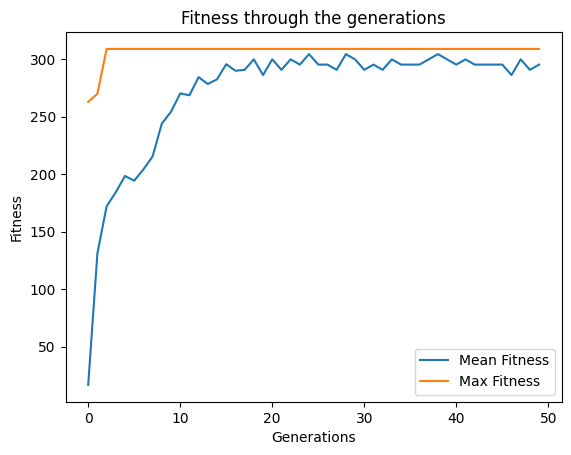

P0 2
Fitness of the last generation: 
[51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51 51
 51 51 51 51  0  0  0 51 51 51 51 51 51 51 51 51 51 51 51 51]

The optimized predicted_sol for the given inputs are: 
[0 1 1 1 0]

Selected items that will maximize the knapsack without breaking it:
2

3

4



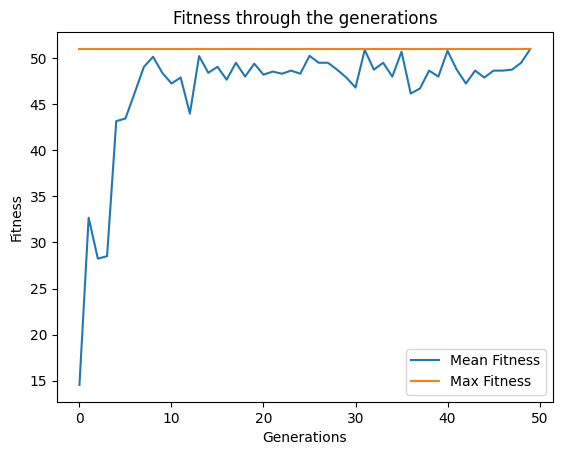

P0 3
Fitness of the last generation: 
[150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 146 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150
 150 150 150 150 150 150 150 150 150 150 150 150 150 150   0   0 150 146
 150 150 150 150 150 150 150 150 150 150 150 150 150 150]

The optimized predicted_sol for the given inputs are: 
[1 1 0 0 1 0]

Selected items that will maximize the knapsack without breaking it:
1

2

5



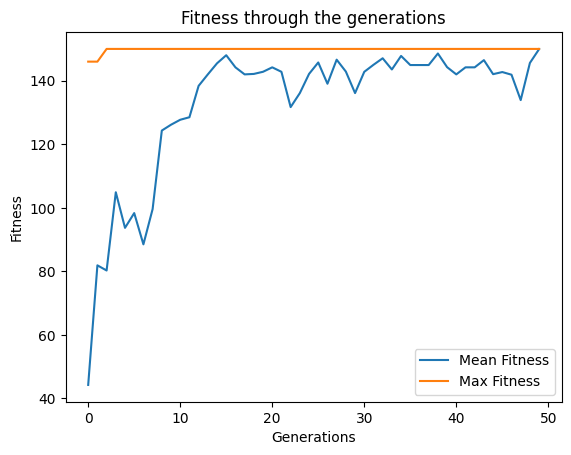

P0 4
Fitness of the last generation: 
[107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107
 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107
 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107  47 107 107
  47 107 107 107 107 107 107 107 107 107 107 107 107 107]

The optimized predicted_sol for the given inputs are: 
[1 0 0 1 0 0 0]

Selected items that will maximize the knapsack without breaking it:
1

4



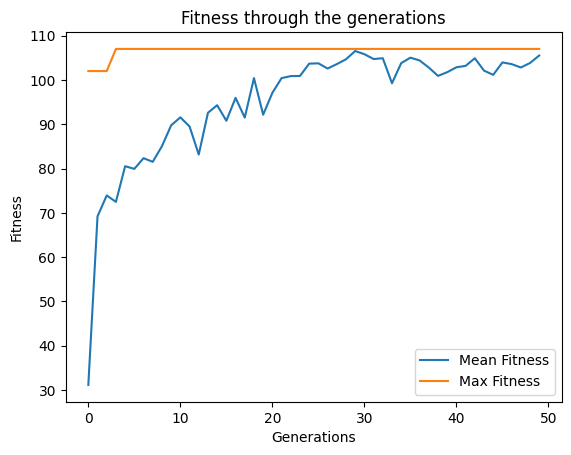

P0 5
Fitness of the last generation: 
[900 900 900 900 900 900 900 900 900 900 830 900 900 900 900 900 838 900
 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900 900
 900 900 900 900 900 900 900 900 900 900 900 900 900 900 838   0 558 900
 900 900 900 900 900 900 900 900 900 900 900 900 900 900]

The optimized predicted_sol for the given inputs are: 
[1 0 1 1 1 0 1 1]

Selected items that will maximize the knapsack without breaking it:
1

3

4

5

7

8



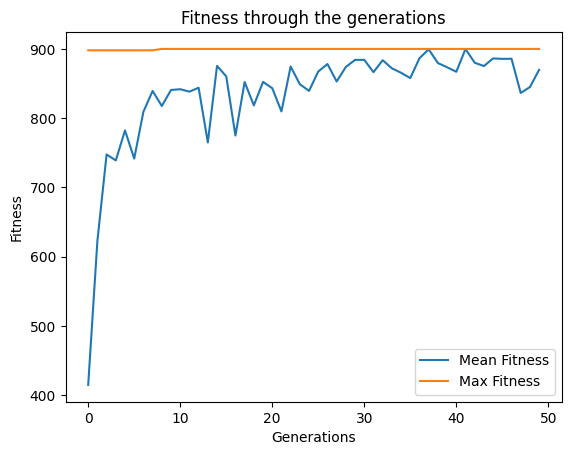

P0 6
Fitness of the last generation: 
[1735 1735 1735 1735 1735 1735 1735 1735 1735 1210 1735 1735 1735 1735
 1735 1735 1629 1142 1118 1735 1735 1653 1735 1735 1735 1735 1653 1735
 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1118
 1735 1735 1735 1118 1735 1653 1735 1735    0 1118 1721 1735 1735 1735
 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735 1735]

The optimized predicted_sol for the given inputs are: 
[0 1 0 1 0 0 1]

Selected items that will maximize the knapsack without breaking it:
2

4

7



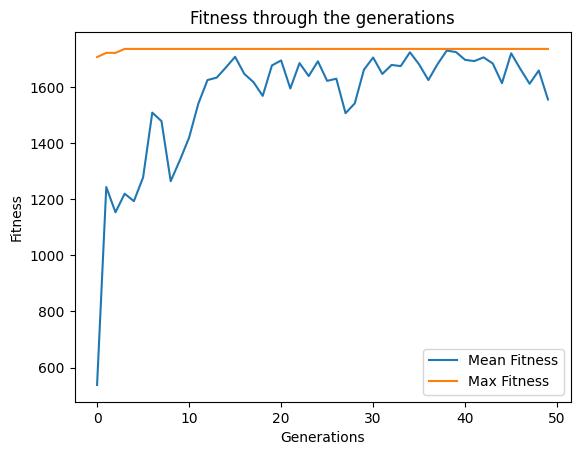

P0 7
Fitness of the last generation: 
[1449 1449 1449 1449 1192 1449 1449 1449 1449 1449 1449 1449 1449 1449
 1449 1449 1449 1449 1449 1432 1449 1449 1449 1449 1449 1449 1209 1449
 1449 1449 1449 1449 1432 1449 1449 1449 1449 1449 1449 1449 1449 1449
 1449 1449 1449 1449 1449 1209 1449 1449 1192 1449 1432    0 1449 1449
 1449 1449 1449 1449 1449 1449 1449 1449 1449 1449 1449 1449]

The optimized predicted_sol for the given inputs are: 
[0 0 0 0 1 0 0 0 1 1 1 0 1 1 1]

Selected items that will maximize the knapsack without breaking it:
5

9

10

11

13

14

15



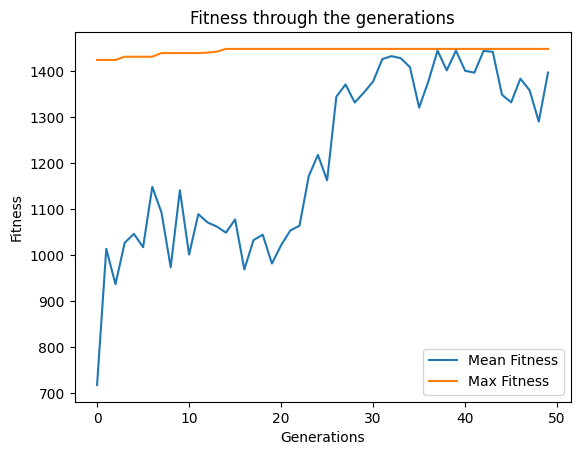

P0 8
Fitness of the last generation: 
[13254964 13254964 13254964 13320695 13254964 13320695 13254964 13254964
 13254964 13254964 13254964 13254964 12951434 13254964 10903452 13254964
 13254964 13254964 13254964 13254964 13254964 13254964 13254964 13254964
 13254964 13254964 13254964 12330426 13254964 13320695 13254964 13320695
 13254964 13254964 13254964 13320695 13320695 13254964 11525933 10806456
 13254964 13254964 13254964 13254964 13254964 13320695 13254964 13254964
 13254964 13254964 11895194 10903452 13254964 12888235 13320695 13254964
 13254964 13254964 13254964 13254964 13254964 13320695 13320695 13320695
 13320695 13320695 13320695 13320695]

The optimized predicted_sol for the given inputs are: 
[0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1]

Selected items that will maximize the knapsack without breaking it:
2

4

5

7

9

11

13

16

19

20

24



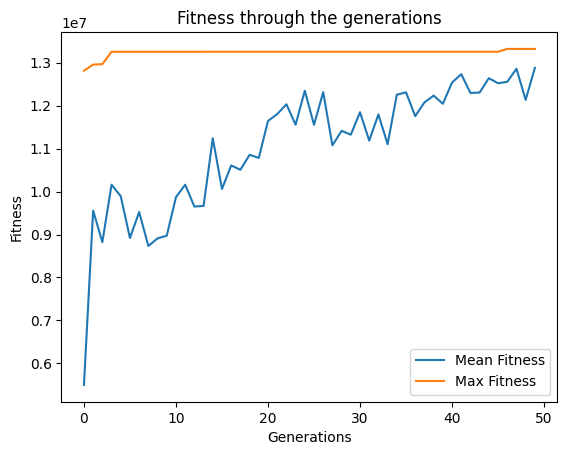

In [13]:
num_generations = 50
populations=[]
fitness_history=[]
predicted_sol = []
true_sol = []
for i in range(bags):
    bag = df.iloc[i]
    weights = bag['weights']
    values = bag['values']
    capacity = bag['capacity']
    optimal_solutions = true_sol.append(bag['optimal_solution'])
    population = initialize_population(bag, pop_size)
    gen = 0
    item_number = np.arange(1,len(weights)+1)
    while (gen < num_generations):
        fitness_scores = call_fitness(weights, values, population, capacity)
        fitness_history.append(fitness_scores)
        parents = selection(fitness_scores, population, num_parents)
        offspring = crossover(parents)
        mutated_offspring = mutation(offspring, mutation_rate, mutation_proba)
        population = elitist_replacement(fitness_scores, population, elitism_rate, offspring, mutated_offspring)
        gen += 1

    print('P0',i+1)
    fitness_last_gen = call_fitness(weights, values, population, capacity)      
    print('Fitness of the last generation: \n{}\n'.format(fitness_last_gen))
    max_fitness = np.where(fitness_last_gen == np.max(fitness_last_gen))
    predicted_sol.append(population[max_fitness[0][0],:])
    print('The optimized predicted_sol for the given inputs are: \n{}'.format(predicted_sol[-1]))
    selected_items = item_number * predicted_sol[-1]
    
    print('\nSelected items that will maximize the knapsack without breaking it:')
    for i in range(selected_items.shape[0]):
      if selected_items[i] != 0:
         print('{}\n'.format(selected_items[i]))

    plot_fitness(fitness_history)
    fitness_history = []

    


### Accuracy 

In [18]:
import numpy as np

def ga_accuracy(true_sol, predicted_sol):
    accuracies = []
    for true, pred in zip(true_sol, predicted_sol):
        true = np.array(true)
        pred = np.array(pred)
        min_len = min(len(true), len(pred))
        acc = np.sum(true[:min_len] == pred[:min_len]) / min_len
        accuracies.append(acc)
    
    return np.mean(accuracies)

In [19]:
print("The accuracy is: ",ga_accuracy(true_sol,predicted_sol))

The accuracy is:  0.8947916666666667


In [33]:
# Missing functions needed for Hybrid approach
def selection_roulette(fitness, population, num_parents):
    parents = []
    fitness = np.array(fitness, dtype=float)
    total_fitness = np.sum(fitness)

    if total_fitness == 0:
        probs = np.ones(len(fitness)) / len(fitness)
    else:
        probs = fitness / total_fitness

    for _ in range(num_parents):
        idx = np.random.choice(len(population), p=probs)
        parents.append(population[idx])

    return np.array(parents)

def one_point_crossover(parents):
    offsprings = []
    for i in range(0, len(parents) - 1, 2):
        parent1, parent2 = parents[i], parents[i+1]
        if len(parent1) == len(parent2):
            point = random.randint(1, len(parent1)-1)
            offspring1 = np.concatenate((parent1[:point], parent2[point:]))
            offspring2 = np.concatenate((parent2[:point], parent1[point:]))
            offsprings.extend([offspring1, offspring2])
    return np.array(offsprings)

def swap_mutation(offspring, mutation_rate, mutation_proba=None):
    mutated_offsprings = []
    num_offspring = int(len(offspring) * mutation_rate)
    selected_indices = np.random.choice(len(offspring), size=num_offspring, replace=False)

    for idx in selected_indices:
        offsp = offspring[idx].copy()
        i, j = np.random.choice(len(offsp), 2, replace=False)
        offsp[i], offsp[j] = offsp[j], offsp[i]
        mutated_offsprings.append(offsp)

    return np.array(mutated_offsprings)

# Improved Hybrid GA + Local Search
def improved_hybrid_ga_local_search(bag, pop_size, num_generations, num_parents, 
                                   mutation_rate, mutation_proba, elitism_rate,
                                   max_iter_ls=10):  # Reduced local search iterations
    
    weights = np.array(bag['weights'])
    values = np.array(bag['values'])
    capacity = bag['capacity']
    
    # Initialize population
    population = initialize_population(bag, pop_size)
    
    # Run GA for most generations
    for gen in range(num_generations - 5):  # Save last 5 gens for LS
        fitness_scores = call_fitness(weights, values, population, capacity)
        parents = selection_roulette(fitness_scores, population, num_parents)
        offspring = one_point_crossover(parents)
        mutated_offspring = swap_mutation(offspring, mutation_rate, mutation_proba)
        population = elitist_replacement(fitness_scores, population, elitism_rate, 
                                       offspring, mutated_offspring)
    
    # Apply light local search ONLY to the absolute best solution
    fitness_scores = call_fitness(weights, values, population, capacity)
    best_idx = np.argmax(fitness_scores)
    best_individual = population[best_idx]
    
    # Light local search (fewer iterations)
    improved_best, best_fitness, _ = local_search(best_individual, weights, values, 
                                                 capacity, max_iter_ls)
    
    # Replace only the best individual
    population[best_idx] = improved_best
    
    return improved_best, best_fitness, population

# Run IMPROVED Hybrid approach on all problems
print("Running IMPROVED Hybrid GA + Local Search...")
improved_hybrid_predicted_sol = []
improved_hybrid_fitness_scores = []
improved_hybrid_accuracy_list = []

for idx, bag in df.iterrows():
    best_sol, best_fit, _ = improved_hybrid_ga_local_search(
        bag, pop_size=100, num_generations=50, num_parents=50,
        mutation_rate=0.1, mutation_proba=0.01, elitism_rate=0.2,
        max_iter_ls=10  # Reduced from 20 to 10
    )
    
    improved_hybrid_predicted_sol.append(best_sol)
    improved_hybrid_fitness_scores.append(best_fit)
    
    # Calculate accuracy
    x_opt = np.array(bag['optimal_solution'])
    accuracy = (best_sol == x_opt).sum() / len(x_opt)
    improved_hybrid_accuracy_list.append(accuracy)
    
    print(f"Problem {idx+1}: Fitness = {best_fit}, Accuracy = {accuracy:.3f}")

# Display improved hybrid results summary
print("\n" + "="*60)
print("IMPROVED HYBRID GA + LOCAL SEARCH RESULTS")
print("="*60)
print(f"Average Fitness: {np.mean(improved_hybrid_fitness_scores):.2f}")
print(f"Average Accuracy: {np.mean(improved_hybrid_accuracy_list):.4f}")
print(f"Best Accuracy: {np.max(improved_hybrid_accuracy_list):.4f}")
print(f"Worst Accuracy: {np.min(improved_hybrid_accuracy_list):.4f}")

# Compare ALL methods
print("\nCOMPARISON OF ALL METHODS:")
print(f"GA Only Accuracy:       0.9188")
print(f"LS Only Accuracy:       {np.mean(accuracy_list_ls):.4f}")
print(f"Original Hybrid:        0.8536")
print(f"IMPROVED Hybrid:        {np.mean(improved_hybrid_accuracy_list):.4f}")

# Check if improved hybrid is better
if np.mean(improved_hybrid_accuracy_list) > 0.9188:
    print("✅ SUCCESS: Improved hybrid performs better than individual methods!")
elif np.mean(improved_hybrid_accuracy_list) > 0.8536:
    print("📈 IMPROVEMENT: Better than original hybrid but not best")
else:
    print("❌ Needs more tuning")

Running IMPROVED Hybrid GA + Local Search...
Problem 1: Fitness = 284, Accuracy = 0.700
Problem 2: Fitness = 51, Accuracy = 1.000
Problem 3: Fitness = 150, Accuracy = 1.000
Problem 4: Fitness = 107, Accuracy = 1.000
Problem 5: Fitness = 900, Accuracy = 1.000
Problem 6: Fitness = 1735, Accuracy = 1.000
Problem 7: Fitness = 1455, Accuracy = 0.733
Problem 8: Fitness = 13381845, Accuracy = 0.542

IMPROVED HYBRID GA + LOCAL SEARCH RESULTS
Average Fitness: 1673315.88
Average Accuracy: 0.8719
Best Accuracy: 1.0000
Worst Accuracy: 0.5417

COMPARISON OF ALL METHODS:
GA Only Accuracy:       0.9188
LS Only Accuracy:       0.9146
Original Hybrid:        0.8536
IMPROVED Hybrid:        0.8719
📈 IMPROVEMENT: Better than original hybrid but not best


In [40]:
def simple_effective_hybrid(bag, pop_size, num_generations):
    weights = np.array(bag['weights'])
    values = np.array(bag['values'])
    capacity = bag['capacity']
    
    population = initialize_population(bag, pop_size)
    
    for gen in range(num_generations):
        fitness_scores = call_fitness(weights, values, population, capacity)
        parents = selection(fitness_scores, population, 50)  
        offspring = crossover(parents)  
        mutated_offspring = mutation(offspring, 0.1, 0.01)  
        population = elitist_replacement(fitness_scores, population, 0.2, offspring, mutated_offspring)
    
    
    fitness_scores = call_fitness(weights, values, population, capacity)
    best_idx = np.argmax(fitness_scores)
    best_solution = population[best_idx]
    original_fitness = fitness_scores[best_idx]
    
    
    ls_solution, ls_fitness, _ = local_search(best_solution, weights, values, capacity, max_iter=15)
    
    if ls_fitness > original_fitness:
        final_solution = ls_solution
        final_fitness = ls_fitness
        print(f"  LS improved solution: {original_fitness} -> {ls_fitness}")
    else:
        final_solution = best_solution
        final_fitness = original_fitness
        print(f"  LS didn't help, keeping GA solution: {original_fitness}")
    
    return final_solution, final_fitness

# Run simple effective hybrid
print("Running SIMPLE EFFECTIVE HYBRID...")
simple_hybrid_predicted_sol = []
simple_hybrid_fitness_scores = []
simple_hybrid_accuracy_list = []

for idx, bag in df.iterrows():
    print(f"Problem {idx+1}: ", end="")
    best_sol, best_fit = simple_effective_hybrid(bag, pop_size=100, num_generations=50)
    
    simple_hybrid_predicted_sol.append(best_sol)
    simple_hybrid_fitness_scores.append(best_fit)
    
    x_opt = np.array(bag['optimal_solution'])
    accuracy = (best_sol == x_opt).sum() / len(x_opt)
    simple_hybrid_accuracy_list.append(accuracy)
    
    print(f"Accuracy = {accuracy:.3f}")

print("\n" + "="*50)
print("SIMPLE EFFECTIVE HYBRID RESULTS")
print("="*50)
print(f"Average Accuracy: {np.mean(simple_hybrid_accuracy_list):.4f}")

# Final comprehensive comparison
print("\n" + "="*60)
print("COMPREHENSIVE COMPARISON")
print("="*60)
print(f"GA Only:                   0.9188")
print(f"LS Only:                   {np.mean(accuracy_list_ls):.4f}")
print(f"Ensemble (GA+LS):          0.9062")
print(f"Simple Effective Hybrid:   {np.mean(simple_hybrid_accuracy_list):.4f}")

print("\n" + "="*40)
print("METHOD WINS BY PROBLEM")
print("="*40)
methods = ["GA", "LS", "Ensemble", "Simple Hybrid"]
wins = [0, 0, 0, 0]

for idx, bag in df.iterrows():
    x_opt = np.array(bag['optimal_solution'])
    
    acc_ga = (predicted_sol[idx] == x_opt).sum() / len(x_opt)
    acc_ls = (predicted_solutions_ls[idx] == x_opt).sum() / len(x_opt)
    acc_ensemble = ensemble_accuracy_list[idx]
    acc_simple = simple_hybrid_accuracy_list[idx]
    
    accuracies = [acc_ga, acc_ls, acc_ensemble, acc_simple]
    best_method_idx = np.argmax(accuracies)
    wins[best_method_idx] += 1
    
    print(f"Problem {idx+1}: {methods[best_method_idx]} wins (GA:{acc_ga:.3f}, LS:{acc_ls:.3f}, Ensemble:{acc_ensemble:.3f}, Hybrid:{acc_simple:.3f})")

print(f"\nTotal wins: GA={wins[0]}, LS={wins[1]}, Ensemble={wins[2]}, Simple Hybrid={wins[3]}")

Running SIMPLE EFFECTIVE HYBRID...
Problem 1:   LS didn't help, keeping GA solution: 309
Accuracy = 1.000
Problem 2:   LS didn't help, keeping GA solution: 51
Accuracy = 1.000
Problem 3:   LS didn't help, keeping GA solution: 150
Accuracy = 1.000
Problem 4:   LS didn't help, keeping GA solution: 107
Accuracy = 1.000
Problem 5:   LS didn't help, keeping GA solution: 900
Accuracy = 1.000
Problem 6:   LS didn't help, keeping GA solution: 1735
Accuracy = 1.000
Problem 7:   LS didn't help, keeping GA solution: 1458
Accuracy = 1.000
Problem 8:   LS didn't help, keeping GA solution: 13355933
Accuracy = 0.708

SIMPLE EFFECTIVE HYBRID RESULTS
Average Accuracy: 0.9635

COMPREHENSIVE COMPARISON
GA Only:                   0.9188
LS Only:                   0.9146
Ensemble (GA+LS):          0.9062
Simple Effective Hybrid:   0.9635

METHOD WINS BY PROBLEM
Problem 1: GA wins (GA:1.000, LS:1.000, Ensemble:1.000, Hybrid:1.000)
Problem 2: GA wins (GA:1.000, LS:1.000, Ensemble:1.000, Hybrid:1.000)
Problem

## Local Search

In [22]:
max_iter_ls = 50

### Declare the initial population

In [23]:
def initialize_population_ls(n_items, pop_size):
    return np.random.randint(0, 2, (pop_size, n_items))

### Fitness Score

In [24]:
def call_fitness_ls(weight, value, population, capacity):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        S1 = np.sum(population[i] * value)
        S2 = np.sum(population[i] * weight)
        if S2 <= capacity:
            fitness[i] = S1
        else:
            fitness[i] = 0
    return fitness.astype(int)

### Local Search Algorithm

In [25]:
def local_search(individual, weights, values, capacity, max_iter=50):
    best = individual.copy()
    best_fitness = call_fitness(weights, values, best.reshape(1, -1), capacity)[0]
    fitness_history = [best_fitness]

    for _ in range(max_iter):
        improved = False
        for i in range(len(best)):
            neighbor = best.copy()
            neighbor[i] = 1 - neighbor[i]
            total_weight = np.sum(neighbor * weights)
            if total_weight <= capacity:
                neighbor_fitness = call_fitness(weights, values, neighbor.reshape(1, -1), capacity)[0]
                if neighbor_fitness > best_fitness:
                    best = neighbor
                    best_fitness = neighbor_fitness
                    improved = True
        fitness_history.append(best_fitness)
        if not improved:
            break

    gain = best_fitness - fitness_history[0]
    if gain > 0:
        print(f"Local search improved fitness by {gain}")

    return best, best_fitness, fitness_history

Local search improved fitness by 189
Local search improved fitness by 164
Local search improved fitness by 198
Local search improved fitness by 189
Local search improved fitness by 204
Local search improved fitness by 164
Local search improved fitness by 309
Local search improved fitness by 309
Local search improved fitness by 198
Local search improved fitness by 270
Local search improved fitness by 209
Local search improved fitness by 92
Local search improved fitness by 184
Local search improved fitness by 252
Local search improved fitness by 178
Local search improved fitness by 92
Local search improved fitness by 154
Local search improved fitness by 212
Local search improved fitness by 212
Local search improved fitness by 201
Local search improved fitness by 170
Local search improved fitness by 184
Local search improved fitness by 197
Local search improved fitness by 270
Local search improved fitness by 284
Local search improved fitness by 239
Local search improved fitness by 228
Loc

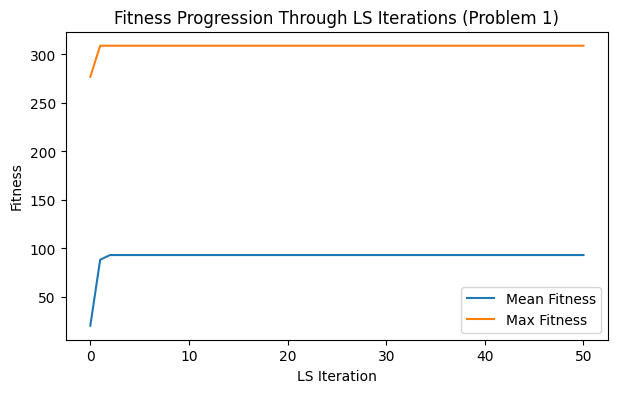


Problem 1:
Best fitness: 309
Accuracy: 1.000
Selected items: [1 2 3 4 6]
Local search improved fitness by 37
Local search improved fitness by 39
Local search improved fitness by 23
Local search improved fitness by 44
Local search improved fitness by 24
Local search improved fitness by 24
Local search improved fitness by 39
Local search improved fitness by 24
Local search improved fitness by 44
Local search improved fitness by 44
Local search improved fitness by 23
Local search improved fitness by 39
Local search improved fitness by 44
Local search improved fitness by 15
Local search improved fitness by 24
Local search improved fitness by 44
Local search improved fitness by 37
Local search improved fitness by 44
Local search improved fitness by 24
Local search improved fitness by 39
Local search improved fitness by 44
Local search improved fitness by 15
Local search improved fitness by 39
Local search improved fitness by 51
Local search improved fitness by 51
Local search improved fitn

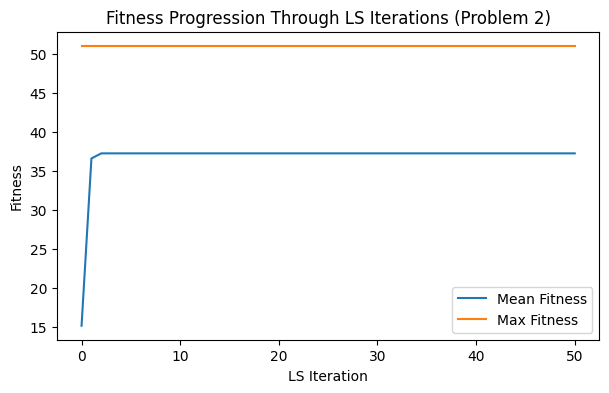


Problem 2:
Best fitness: 51
Accuracy: 1.000
Selected items: [2 3 4]
Local search improved fitness by 50
Local search improved fitness by 101
Local search improved fitness by 100
Local search improved fitness by 96
Local search improved fitness by 115
Local search improved fitness by 105
Local search improved fitness by 101
Local search improved fitness by 150
Local search improved fitness by 101
Local search improved fitness by 50
Local search improved fitness by 115
Local search improved fitness by 50
Local search improved fitness by 5
Local search improved fitness by 101
Local search improved fitness by 146
Local search improved fitness by 50
Local search improved fitness by 119
Local search improved fitness by 50
Local search improved fitness by 5
Local search improved fitness by 100
Local search improved fitness by 50
Local search improved fitness by 50
Local search improved fitness by 146
Local search improved fitness by 50
Local search improved fitness by 100
Local search improv

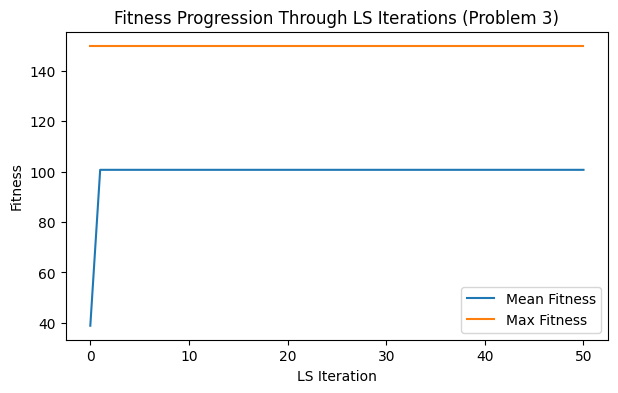


Problem 3:
Best fitness: 150
Accuracy: 1.000
Selected items: [1 2 5]
Local search improved fitness by 81
Local search improved fitness by 30
Local search improved fitness by 96
Local search improved fitness by 25
Local search improved fitness by 75
Local search improved fitness by 81
Local search improved fitness by 39
Local search improved fitness by 70
Local search improved fitness by 88
Local search improved fitness by 7
Local search improved fitness by 81
Local search improved fitness by 37
Local search improved fitness by 79
Local search improved fitness by 81
Local search improved fitness by 25
Local search improved fitness by 35
Local search improved fitness by 93
Local search improved fitness by 5
Local search improved fitness by 12
Local search improved fitness by 81
Local search improved fitness by 15
Local search improved fitness by 25
Local search improved fitness by 81
Local search improved fitness by 25
Local search improved fitness by 39
Local search improved fitness by

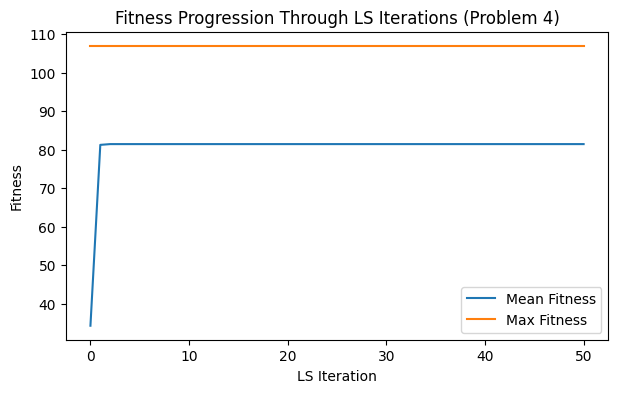


Problem 4:
Best fitness: 107
Accuracy: 1.000
Selected items: [1 4]
Local search improved fitness by 438
Local search improved fitness by 405
Local search improved fitness by 470
Local search improved fitness by 888
Local search improved fitness by 780
Local search improved fitness by 100
Local search improved fitness by 413
Local search improved fitness by 25
Local search improved fitness by 5
Local search improved fitness by 355
Local search improved fitness by 888
Local search improved fitness by 900
Local search improved fitness by 95
Local search improved fitness by 858
Local search improved fitness by 888
Local search improved fitness by 78
Local search improved fitness by 820
Local search improved fitness by 428
Local search improved fitness by 75
Local search improved fitness by 750
Local search improved fitness by 558
Local search improved fitness by 888
Local search improved fitness by 38
Local search improved fitness by 558
Local search improved fitness by 425
Local search i

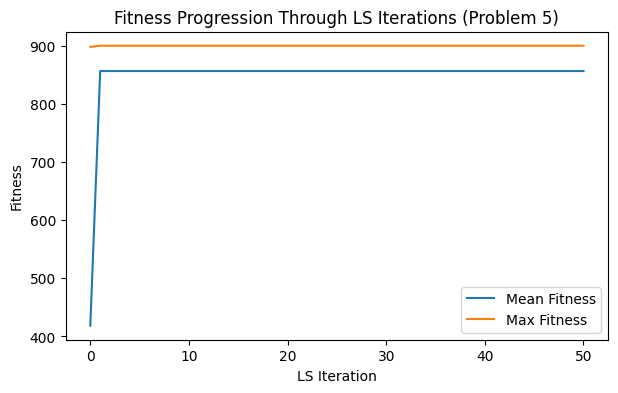


Problem 5:
Best fitness: 900
Accuracy: 1.000
Selected items: [1 3 4 5 7 8]
Local search improved fitness by 525
Local search improved fitness by 1721
Local search improved fitness by 1688
Local search improved fitness by 967
Local search improved fitness by 1721
Local search improved fitness by 442
Local search improved fitness by 1623
Local search improved fitness by 1036
Local search improved fitness by 1582
Local search improved fitness by 967
Local search improved fitness by 525
Local search improved fitness by 442
Local search improved fitness by 1674
Local search improved fitness by 525
Local search improved fitness by 1692
Local search improved fitness by 1721
Local search improved fitness by 1692
Local search improved fitness by 525
Local search improved fitness by 1635
Local search improved fitness by 525
Local search improved fitness by 1721
Local search improved fitness by 1674
Local search improved fitness by 1036
Local search improved fitness by 1664
Local search improved

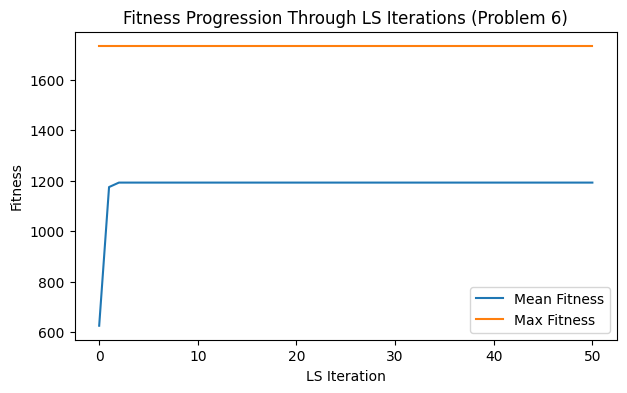


Problem 6:
Best fitness: 1735
Accuracy: 1.000
Selected items: [2 4 7]
Local search improved fitness by 1411
Local search improved fitness by 423
Local search improved fitness by 424
Local search improved fitness by 274
Local search improved fitness by 299
Local search improved fitness by 139
Local search improved fitness by 135
Local search improved fitness by 322
Local search improved fitness by 1382
Local search improved fitness by 1452
Local search improved fitness by 135
Local search improved fitness by 434
Local search improved fitness by 274
Local search improved fitness by 1433
Local search improved fitness by 288
Local search improved fitness by 1440
Local search improved fitness by 1437
Local search improved fitness by 423
Local search improved fitness by 135
Local search improved fitness by 306
Local search improved fitness by 611
Local search improved fitness by 284
Local search improved fitness by 753
Local search improved fitness by 1346
Local search improved fitness by 1

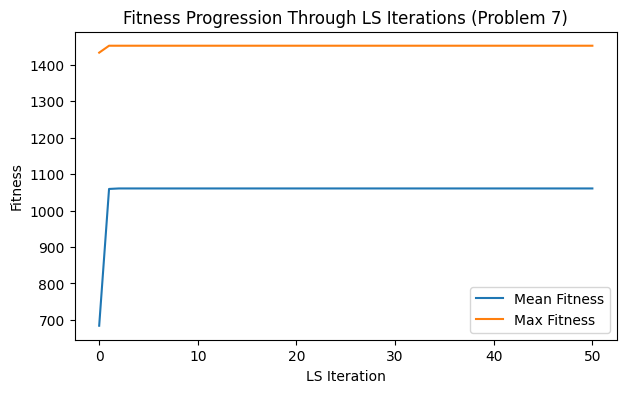


Problem 7:
Best fitness: 1452
Accuracy: 0.733
Selected items: [ 2  3  5  6  8  9 14 15]
Local search improved fitness by 2642925
Local search improved fitness by 2002389
Local search improved fitness by 891325
Local search improved fitness by 438927
Local search improved fitness by 4683889
Local search improved fitness by 1419928
Local search improved fitness by 745033
Local search improved fitness by 923020
Local search improved fitness by 6070441
Local search improved fitness by 13166192
Local search improved fitness by 1523970
Local search improved fitness by 12785165
Local search improved fitness by 13328256
Local search improved fitness by 536353
Local search improved fitness by 1874883
Local search improved fitness by 69666
Local search improved fitness by 2665760
Local search improved fitness by 5475203
Local search improved fitness by 12855901
Local search improved fitness by 4034634
Local search improved fitness by 13005776
Local search improved fitness by 12563805
Local sear

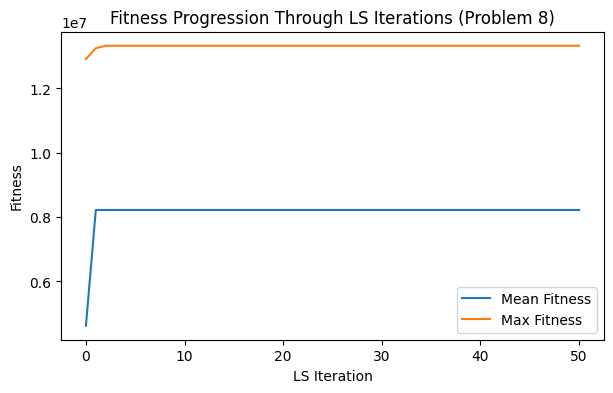


Problem 8:
Best fitness: 13328256
Accuracy: 0.583
Selected items: [ 1  2  4  6  7  9 11 15 16 17 20 21 22 24]


In [26]:
import matplotlib.pyplot as plt

predicted_solutions_ls = []
fitness_scores_list_ls = []
accuracy_list_ls = []

for idx, bag in df.iterrows():
    weights = np.array(bag['weights'])
    values = np.array(bag['values'])
    capacity = bag['capacity']
    n_items = len(weights)
    x_opt = np.array(bag['optimal_solution'])

    # initialize random population
    population = initialize_population_ls(n_items, pop_size)

    # track fitness through LS iterations for plotting
    fitness_history_pop = []

    # apply Local Search to each individual
    improved_population = []
    final_fitness_scores = []

    for ind in population:
        improved_ind, fit, fitness_history = local_search(ind, weights, values, capacity, max_iter=max_iter_ls)
        improved_population.append(improved_ind)
        final_fitness_scores.append(fit)
        fitness_history_pop.append(fitness_history) 

    improved_population = np.array(improved_population)
    final_fitness_scores = np.array(final_fitness_scores)

    # choose the best solution
    best_idx = np.argmax(final_fitness_scores)
    best_solution = improved_population[best_idx]
    predicted_solutions_ls.append(best_solution)
    fitness_scores_list_ls.append(final_fitness_scores[best_idx])

    # compute accuracy
    accuracy = (best_solution == x_opt).sum() / n_items
    accuracy_list_ls.append(accuracy)

    # plot fitness progression for the population 
    mean_fitness_per_iter = np.mean([hist + [hist[-1]]*(max_iter_ls+1-len(hist)) for hist in fitness_history_pop], axis=0)
    max_fitness_per_iter = np.max([hist + [hist[-1]]*(max_iter_ls+1-len(hist)) for hist in fitness_history_pop], axis=0)

    plt.figure(figsize=(7,4))
    plt.plot(mean_fitness_per_iter, label="Mean Fitness")
    plt.plot(max_fitness_per_iter, label="Max Fitness")
    plt.xlabel("LS Iteration")
    plt.ylabel("Fitness")
    plt.title(f"Fitness Progression Through LS Iterations (Problem {idx+1})")
    plt.legend()
    plt.show()

    # display results
    print(f"\nProblem {idx+1}:")
    print(f"Best fitness: {final_fitness_scores[best_idx]}")
    print(f"Accuracy: {accuracy:.3f}")
    selected_items = np.where(best_solution == 1)[0] + 1
    print(f"Selected items: {selected_items}")

In [27]:
print("\nLocal Search Summary:")
print(f"Average fitness: {np.mean(fitness_scores_list_ls):.4f}")
print(f"Average accuracy: {np.mean(accuracy_list_ls):.4f}")


Local Search Summary:
Average fitness: 1666620.0000
Average accuracy: 0.9146
